In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
test_1 = pd.read_excel('D:/C/test_1.xls')
test_2 = pd.read_excel('D:/C/test_2.xls',names=['date','time','ID','number','price','type','discount'])
test_3 = pd.read_excel('D:/C/test_3.xls')
test_4 = pd.read_excel('D:/C/test_4.xls')
test_2

FileNotFoundError: [Errno 2] No such file or directory: 'D:/C/test_1.xls'

In [9]:
statisc = test_2.describe()
statisc

,ID,number,price
count,8.785030e+05,878503.000000,878503.000000
mean,1.030313e+14,0.536112,8.917144
std,7.174368e+11,0.400087,6.311265
min,1.029000e+14,-9.082000,0.100000
25%,1.029000e+14,0.290000,4.900000
50%,1.029000e+14,0.435000,7.900000
75%,1.029000e+14,0.742000,10.800000
max,1.069740e+14,160.000000,119.900000


In [ ]:
statisc.loc['range'] = statisc.loc['max']-statisc.loc['min'] #极差
statisc.loc['var'] = statisc.loc['std'] - statisc.loc['mean'] #变异系数
statisc.loc['dis'] = statisc.loc['75%'] - statisc.loc['25%']
statisc

NameError: name 'test_2' is not defined

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

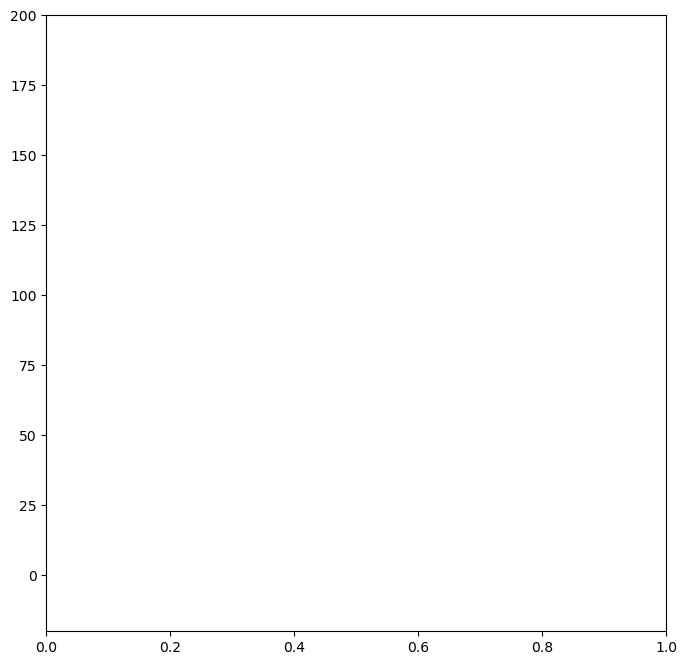

In [2]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (8,8))
plt.ylim(-20,200)
p=test_2.boxplot(return_type='dict')
x = p['fliers'][0].get_xdata
y = p['fliers'][0].get_ydata
plt.show()

In [13]:
bins = [-20,0,5,25,50,200]
labels = ['[-20,0]','[0,5]','[5,25]','[25,50]','[50,200]']
test_2['number频分层'] = pd.cut(test_2.number,bins,labels = labels)

In [14]:
test_2

,date,time,ID,number,price,type,discount,number频分层
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否,"[0,5]"
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否,"[0,5]"
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否,"[0,5]"
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否,"[0,5]"
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否,"[0,5]"
...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否,"[0,5]"
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否,"[0,5]"
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否,"[0,5]"
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否,"[0,5]"


In [15]:
aggresult = test_2.groupby('number频分层').agg({'number':np.size})
paggresult = aggresult/aggresult.sum()*100
paggresult

,number
number频分层,
"[-20,0]",0.052476
"[0,5]",99.932954
"[5,25]",0.014343
"[25,50]",0.000114
"[50,200]",0.000114


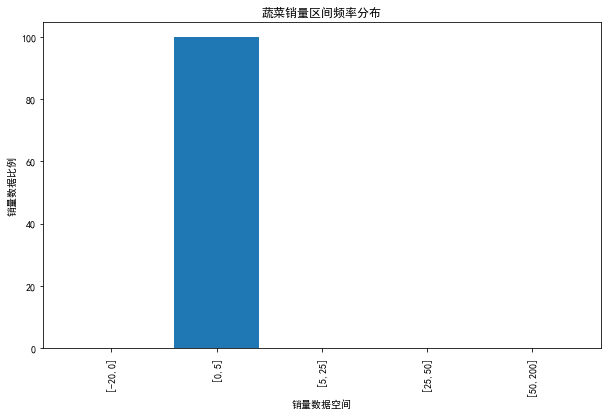

In [16]:
plt.figure(figsize=(10,6))
paggresult['number'].plot(kind='bar',width=0.8,fontsize=10)
plt.title('蔬菜销量区间频率分布')
plt.xlabel('销量数据空间')
plt.ylabel('销量数据比例')
plt.show()

In [18]:
merger_test = pd.merge(test_1,test_2,left_on = '单品编码',right_on='ID',how='outer')
merger_test_head = merger_test.head()
merger_test_head

,单品编码,单品名称,分类编码,分类名称,date,time,ID,number,price,type,discount,number频分层
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,1.029000e+14,0.743,5.0,销售,否,"[0,5]"
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,1.029000e+14,0.502,5.0,销售,否,"[0,5]"
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,1.029000e+14,0.301,5.0,销售,否,"[0,5]"
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,1.029000e+14,0.382,5.0,销售,否,"[0,5]"
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,1.029000e+14,0.261,5.0,销售,否,"[0,5]"
